
# **IMAGENET - VGG16 - NESNE TANIMA**


---
[<img align="right" width="100" height="100" src="http://www.i2symbol.com/images/symbols/style-letters/circled_latin_capital_letter_a_u24B6_icon_128x128.png">](https://www.ayyucekizrak.com/)



**Colab** için kimlik doğrulama adımları:

In [0]:
!kill -9 -1

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


**Google Drive** içinde ve doğru klasörde bulunmamız için gereken ve kontrol adımları:

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

/bin/bash: google-drive-ocamlfuse: command not found
drive  sample_data


In [0]:
import os
os.chdir("/content/drive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Nesne_Tanima")
!pwd

/content/drive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Nesne_Tanima


In [0]:
!ls "/content/drive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Nesne_Tanima/images"

f16.jpg  inek.jpg  olips.jpeg  van-kedisi.jpg


In [0]:
!ls images

ls: cannot access 'images': No such file or directory


### Kütüphane Kurulumu

In [0]:
!pip3 install -q keras

**ImageNet projesi, görsel nesne tanıma yazılımı araştırmasında kullanılmak üzere tasarlanmış geniş bir görsel veritabanıdır.**

*On milyondan fazla etiketli resim bulunmaktadır.*

**ImageNet veri setinde önceden eğitilmiş bir modeli göreceğiz. 16 katmanlı VGG Net (VGG16) modelini kullanacağız**


![alt text](https://github.com/hnarayanan/artistic-style-transfer/raw/05c95e5ac7001201d1ae9bf734a9224cf3445388/notebooks/images/imagenet-sample.jpg)



**Keras kütüphanesinden import edilmesi gerekenler: VGG16 eğitilmiş modeli**

In [0]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

Using TensorFlow backend.



**Keras'ta önceden ImageNet veri kümesinde eğitilmiş  bir modeli yükleme **

In [0]:
model = VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 14s 0us/step


**Model yapısına bir göz atalım**: Hangi katmanlar var ve katmanların özellikleri neler...

In [0]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(?, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(?, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(?, 28, 28, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu:0' shape=(?, 28, 28, 512) dtype=float32>,
 'block4_co

**Toplam parametre sayısı da bize fikir verebilir** 

In [0]:
model.count_params() # Biraz çok!

138357544

**Drive da bulunduğumuz klasörün içindeki test görüntülerimizin dosya isimlerini görelim ve test işlemi için bu görselleri çağıralım**

In [0]:
import os
os.chdir("/content/drive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Nesne_Tanima/images")
!pwd

/content/drive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Nesne_Tanima/images


In [0]:
!ls "/content/drive/My Drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/Nesne_Tanima/images"

f16.jpg  inek.jpg  olips.jpeg  van-kedisi.jpg


**Bir test resmi yükleyelim ve ön işlemler yapalım**

*   f16
*   inek
*  Van kedisi
*  Olips 



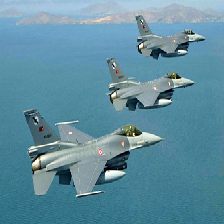

In [0]:
image_path =  'f16.jpg'
image = Image.open(image_path)
image = image.resize((224, 224))
image

In [0]:
# Görüntüyü diziye çevir
x = np.asarray(image, dtype='float32')
# Dizi listesine çevir
x = np.expand_dims(x, axis=0)
# Giriş görüntüsünü eğitim setine uygun şekilde ön işlemleri yap 
x = preprocess_input(x)

### **TEST GÖRÜNTÜSÜ İLE SINIFLAMA YAPMA**
<img align="left" width="200" height="200" src="https://cloud.githubusercontent.com/assets/532272/21507867/3376e9fe-cc4a-11e6-9350-7ec4f680da36.gif">



In [0]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

Predicted: [('n04552348', 'warplane', 0.7603785), ('n02687172', 'aircraft_carrier', 0.22272073), ('n01494475', 'hammerhead', 0.004853819)]
warplane
